### Question 1: Use the yfinance to extract stock data

In [2]:
# Import yfinance library
import yfinance as yf
# Using The Ticker Symbol , Extract the Data
tsla = yf.Ticker("TSLA")

In [48]:
# Using The History, extract Stock information and save it in data frame name tsla_data
tesla_data = tsla.history(period = "max")

In [49]:
#reset the index,save and display the first rows of the tsla_data Dataframe
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Extracting Tesla Revenue data Using Web Scraping

In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [55]:
# Extract tesla_revenue Data from url using web scraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_revenue = requests.get(url).text

#parse the HTML Data using BeautifulSoup using paerser i.e wither html5lib or html.parser
soup = BeautifulSoup(tesla_revenue, "html.parser")

#Create Empty DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

# Find all tables
tables = soup.find_all("table")

# Find the tesla_revenue table by checking heading
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# Loops thorugh the table and extract data
for row in tesla_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        if revenue and revenue != "-":
            tesla_revenue = pd.concat([
                tesla_revenue,
                pd.DataFrame({"Date":[date],"Revenue":[revenue]})
            ],ignore_index = True)

# Execute the Code to remove the comma and dollar sign from the Revenue column.
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "")

# Execute the Code to remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace = True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Dislpay the First 5 rows
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


### Question 3: Extracting GameStop stock data using yfinance

In [19]:
# Import yfinace library
import yfinance as yf

# Using the Ticker symbol, extract data
gme = yf.Ticker("GME")

In [20]:
# Using The History, extract Stock information and save it in data frame name tsla_data
gme_data = gme.history(period = "max")

In [21]:
# Reset the index, Display the first 5 rows
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Extracting Gamestop revenue data using web scraping

In [54]:
# Import Libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [41]:
# Get the web page content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [42]:
#Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.
soup = BeautifulSoup(html_data, "html.parser")

In [43]:
# Create empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find all tables
tables = soup.find_all("table")

# Find the GameStop Revenue table by checking heading
gme_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:  
        gme_table = table
        break

# Loop through the rows and extract data
if gme_table:  # only if table is found
    for row in gme_table.tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            if revenue and revenue != "-":
                gme_revenue = pd.concat([
                    gme_revenue,
                    pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                ], ignore_index=True)

    # Revenue
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "")

In [56]:
# Display the first 5 rows
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5: Tesla Stock and Revenue Dashboard

In [51]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"{stock} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green')
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.show()


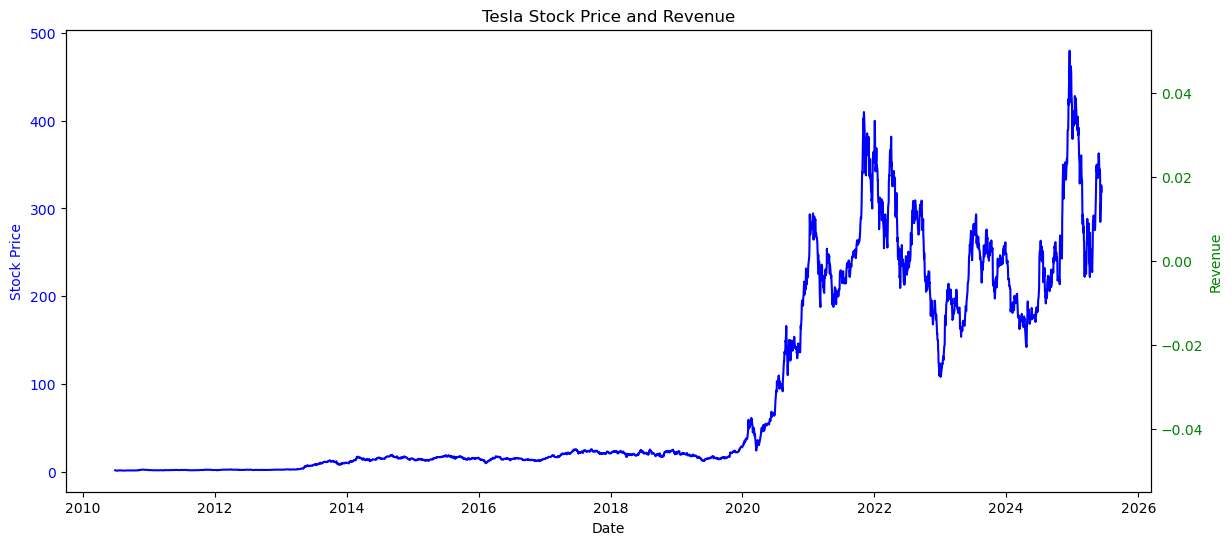

In [52]:
# Reset index to bring 'Date' column back
tesla_data.reset_index(inplace=True)

# Convert to string before using .str.replace
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace('$', '', regex=False).str.replace(',', '')

# Convert to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_data["Close"] = pd.to_numeric(tesla_data["Close"], errors='coerce')

# Convert Date columns
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Now generate the graph
make_graph(tesla_data, tesla_revenue, "Tesla")


### Question 6: GameStop Stock and revenue Dashboard

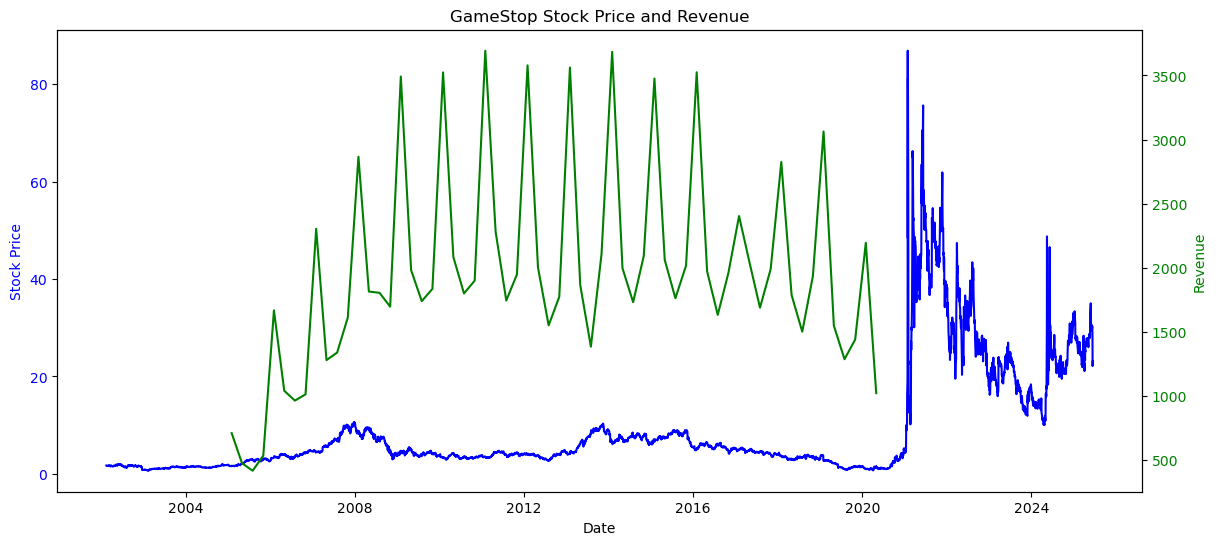

In [53]:
# Reset index to ensure 'Date' is a column
gme_data.reset_index(inplace=True)

# Clean Revenue column: convert to string and remove $ and ,
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace('$', '', regex=False).str.replace(',', '')
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Ensure 'Close' column is numeric
gme_data["Close"] = pd.to_numeric(gme_data["Close"], errors='coerce')

# Convert Date columns to datetime
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Plot the graph
make_graph(gme_data, gme_revenue, "GameStop")